In [290]:
import pandas as pd

df = pd.read_csv("./combined_bus_data (1).csv")

df.head()

,_id_x,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,shape_dist_traveled,timepoint,...,_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station
0,1,4461667-2024-JUN-FINAL-Weekday-01,08:00:00,08:00:00,3610,1,0,0,0.000,1,...,1058,NaN,3rd & Dill,NaN,37.569408,-77.417007,NaN,NaN,0,NaN
1,2,4461667-2024-JUN-FINAL-Weekday-01,08:01:00,08:01:00,576,2,0,0,0.221,0,...,1442,576.0,Brookland Park Boulevard & Woodcliff,NaN,37.570252,-77.420638,NaN,NaN,0,NaN
2,3,4461667-2024-JUN-FINAL-Weekday-01,08:02:00,08:02:00,565,3,0,0,0.408,0,...,1436,565.0,Brookland Park Boulevard & Napoleon,NaN,37.570716,-77.423880,NaN,NaN,0,NaN
3,4,4461667-2024-JUN-FINAL-Weekday-01,08:03:00,08:03:00,3631,4,0,0,0.596,0,...,1075,NaN,Brookland Park & Richmond Henrico Turnpike,NaN,37.571277,-77.427239,NaN,NaN,0,NaN
4,5,4461667-2024-JUN-FINAL-Weekday-01,08:04:00,08:04:00,558,5,0,0,0.762,0,...,1433,558.0,Brookland Park Blvd. & Lamb,NaN,37.571443,-77.430238,NaN,NaN,0,NaN


In [291]:
df.drop(columns=['zone_id', 'stop_url', 'stop_desc', 'parent_station'], inplace=True)

In [292]:
df= df[df["departure_time"]< "24:00:00"]

In [293]:
#df = df[df["departure_time"] != df["arrival_time"]]
df= df[df["arrival_time"]< "24:00:00"]
#df= df[df["departure_time"]< "24:00:00"]

In [294]:
#df['arrival_time'] = pd.to_datetime(df['arrival_time'])
#df['departure_time'] = pd.to_datetime(df['departure_time'])
#df['departure_time'] = df['departure_time'].astype(str)
df['arrival_time'] = df['arrival_time'].astype(str)


In [295]:
df['departure_time'] = pd.to_datetime(df['departure_time'])


C:\Users\Owner\AppData\Local\Temp\ipykernel_344\2136053351.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['departure_time'] = pd.to_datetime(df['departure_time'])


In [296]:
df['arrival_time'] = pd.to_datetime(df['arrival_time'])


C:\Users\Owner\AppData\Local\Temp\ipykernel_344\2247903237.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['arrival_time'] = pd.to_datetime(df['arrival_time'])


In [297]:
df['duration'] = (df['departure_time'] - df['arrival_time']).dt.total_seconds() / 60

In [298]:
df['arrival_time'] = df['arrival_time'].dt.time
df['departure_time'] = df['departure_time'].dt.time

In [299]:
df = df[df["departure_time"] != df["arrival_time"]]
df.shape

(1211, 24)

In [300]:
print(df.dtypes)


_id_x                    int64
trip_id                 object
arrival_time            object
departure_time          object
stop_id                  int64
stop_sequence            int64
pickup_type              int64
drop_off_type            int64
shape_dist_traveled    float64
timepoint                int64
_id_y                    int64
route_id                object
service_id              object
trip_headsign           object
direction_id             int64
block_id                 int64
shape_id                object
_id                      int64
stop_code              float64
stop_name               object
stop_lat               float64
stop_lon               float64
location_type            int64
duration               float64
dtype: object


In [301]:
df.head()

,_id_x,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,shape_dist_traveled,timepoint,...,direction_id,block_id,shape_id,_id,stop_code,stop_name,stop_lat,stop_lon,location_type,duration
3776,3777,4461755-2024-JUN-FINAL-Weekday-01,05:21:00,05:26:00,3419,12,0,0,2.386,1,...,1,577931,50148,968,3419.0,Transfer Station Bay F,37.543309,-77.432306,0,5.0
3808,3809,4461756-2024-JUN-FINAL-Weekday-01,05:36:00,05:41:00,3419,12,0,0,2.386,1,...,1,577948,50148,968,3419.0,Transfer Station Bay F,37.543309,-77.432306,0,5.0
3840,3841,4461757-2024-JUN-FINAL-Weekday-01,05:51:00,05:56:00,3419,12,0,0,2.386,1,...,1,577936,50148,968,3419.0,Transfer Station Bay F,37.543309,-77.432306,0,5.0
3872,3873,4461758-2024-JUN-FINAL-Weekday-01,06:06:00,06:11:00,3419,12,0,0,2.386,1,...,1,577954,50148,968,3419.0,Transfer Station Bay F,37.543309,-77.432306,0,5.0
3904,3905,4461759-2024-JUN-FINAL-Weekday-01,06:21:00,06:26:00,3419,12,0,0,2.386,1,...,1,577972,50148,968,3419.0,Transfer Station Bay F,37.543309,-77.432306,0,5.0


In [302]:
df["arrival_time"].max
df.shape

(1211, 24)

In [303]:
df.dropna()

,_id_x,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,shape_dist_traveled,timepoint,...,direction_id,block_id,shape_id,_id,stop_code,stop_name,stop_lat,stop_lon,location_type,duration
3776,3777,4461755-2024-JUN-FINAL-Weekday-01,05:21:00,05:26:00,3419,12,0,0,2.386,1,...,1,577931,50148,968,3419.0,Transfer Station Bay F,37.543309,-77.432306,0,5.0
3808,3809,4461756-2024-JUN-FINAL-Weekday-01,05:36:00,05:41:00,3419,12,0,0,2.386,1,...,1,577948,50148,968,3419.0,Transfer Station Bay F,37.543309,-77.432306,0,5.0
3840,3841,4461757-2024-JUN-FINAL-Weekday-01,05:51:00,05:56:00,3419,12,0,0,2.386,1,...,1,577936,50148,968,3419.0,Transfer Station Bay F,37.543309,-77.432306,0,5.0
3872,3873,4461758-2024-JUN-FINAL-Weekday-01,06:06:00,06:11:00,3419,12,0,0,2.386,1,...,1,577954,50148,968,3419.0,Transfer Station Bay F,37.543309,-77.432306,0,5.0
3904,3905,4461759-2024-JUN-FINAL-Weekday-01,06:21:00,06:26:00,3419,12,0,0,2.386,1,...,1,577972,50148,968,3419.0,Transfer Station Bay F,37.543309,-77.432306,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236191,236192,4460792-2024-JUN-FINAL-Sunday-01,20:40:00,20:45:00,3419,12,0,0,2.386,1,...,1,577608,50148,968,3419.0,Transfer Station Bay F,37.543309,-77.432306,0,5.0
236223,236224,4460793-2024-JUN-FINAL-Sunday-01,21:10:00,21:15:00,3419,12,0,0,2.386,1,...,1,577583,50148,968,3419.0,Transfer Station Bay F,37.543309,-77.432306,0,5.0
236255,236256,4460794-2024-JUN-FINAL-Sunday-01,21:40:00,21:45:00,3419,12,0,0,2.386,1,...,1,577607,50148,968,3419.0,Transfer Station Bay F,37.543309,-77.432306,0,5.0
236287,236288,4460795-2024-JUN-FINAL-Sunday-01,22:10:00,22:15:00,3419,12,0,0,2.386,1,...,1,577549,50148,968,3419.0,Transfer Station Bay F,37.543309,-77.432306,0,5.0


In [304]:
df.describe

<bound method NDFrame.describe of          _id_x                            trip_id arrival_time departure_time  \
3776      3777  4461755-2024-JUN-FINAL-Weekday-01     05:21:00       05:26:00   
3808      3809  4461756-2024-JUN-FINAL-Weekday-01     05:36:00       05:41:00   
3840      3841  4461757-2024-JUN-FINAL-Weekday-01     05:51:00       05:56:00   
3872      3873  4461758-2024-JUN-FINAL-Weekday-01     06:06:00       06:11:00   
3904      3905  4461759-2024-JUN-FINAL-Weekday-01     06:21:00       06:26:00   
...        ...                                ...          ...            ...   
236191  236192   4460792-2024-JUN-FINAL-Sunday-01     20:40:00       20:45:00   
236223  236224   4460793-2024-JUN-FINAL-Sunday-01     21:10:00       21:15:00   
236255  236256   4460794-2024-JUN-FINAL-Sunday-01     21:40:00       21:45:00   
236287  236288   4460795-2024-JUN-FINAL-Sunday-01     22:10:00       22:15:00   
236319  236320   4460796-2024-JUN-FINAL-Sunday-01     22:45:00       22:50:

In [305]:
df.columns

Index(['_id_x', 'trip_id', 'arrival_time', 'departure_time', 'stop_id',
       'stop_sequence', 'pickup_type', 'drop_off_type', 'shape_dist_traveled',
       'timepoint', '_id_y', 'route_id', 'service_id', 'trip_headsign',
       'direction_id', 'block_id', 'shape_id', '_id', 'stop_code', 'stop_name',
       'stop_lat', 'stop_lon', 'location_type', 'duration'],
      dtype='object')

In [306]:
df.head()

,_id_x,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,shape_dist_traveled,timepoint,...,direction_id,block_id,shape_id,_id,stop_code,stop_name,stop_lat,stop_lon,location_type,duration
3776,3777,4461755-2024-JUN-FINAL-Weekday-01,05:21:00,05:26:00,3419,12,0,0,2.386,1,...,1,577931,50148,968,3419.0,Transfer Station Bay F,37.543309,-77.432306,0,5.0
3808,3809,4461756-2024-JUN-FINAL-Weekday-01,05:36:00,05:41:00,3419,12,0,0,2.386,1,...,1,577948,50148,968,3419.0,Transfer Station Bay F,37.543309,-77.432306,0,5.0
3840,3841,4461757-2024-JUN-FINAL-Weekday-01,05:51:00,05:56:00,3419,12,0,0,2.386,1,...,1,577936,50148,968,3419.0,Transfer Station Bay F,37.543309,-77.432306,0,5.0
3872,3873,4461758-2024-JUN-FINAL-Weekday-01,06:06:00,06:11:00,3419,12,0,0,2.386,1,...,1,577954,50148,968,3419.0,Transfer Station Bay F,37.543309,-77.432306,0,5.0
3904,3905,4461759-2024-JUN-FINAL-Weekday-01,06:21:00,06:26:00,3419,12,0,0,2.386,1,...,1,577972,50148,968,3419.0,Transfer Station Bay F,37.543309,-77.432306,0,5.0


In [307]:
df.shape


(1211, 24)

In [308]:
df.tail()

,_id_x,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,shape_dist_traveled,timepoint,...,direction_id,block_id,shape_id,_id,stop_code,stop_name,stop_lat,stop_lon,location_type,duration
236191,236192,4460792-2024-JUN-FINAL-Sunday-01,20:40:00,20:45:00,3419,12,0,0,2.386,1,...,1,577608,50148,968,3419.0,Transfer Station Bay F,37.543309,-77.432306,0,5.0
236223,236224,4460793-2024-JUN-FINAL-Sunday-01,21:10:00,21:15:00,3419,12,0,0,2.386,1,...,1,577583,50148,968,3419.0,Transfer Station Bay F,37.543309,-77.432306,0,5.0
236255,236256,4460794-2024-JUN-FINAL-Sunday-01,21:40:00,21:45:00,3419,12,0,0,2.386,1,...,1,577607,50148,968,3419.0,Transfer Station Bay F,37.543309,-77.432306,0,5.0
236287,236288,4460795-2024-JUN-FINAL-Sunday-01,22:10:00,22:15:00,3419,12,0,0,2.386,1,...,1,577549,50148,968,3419.0,Transfer Station Bay F,37.543309,-77.432306,0,5.0
236319,236320,4460796-2024-JUN-FINAL-Sunday-01,22:45:00,22:50:00,3419,12,0,0,2.386,1,...,1,577583,50148,968,3419.0,Transfer Station Bay F,37.543309,-77.432306,0,5.0


In [309]:
df.shape

(1211, 24)

In [310]:
df.columns

Index(['_id_x', 'trip_id', 'arrival_time', 'departure_time', 'stop_id',
       'stop_sequence', 'pickup_type', 'drop_off_type', 'shape_dist_traveled',
       'timepoint', '_id_y', 'route_id', 'service_id', 'trip_headsign',
       'direction_id', 'block_id', 'shape_id', '_id', 'stop_code', 'stop_name',
       'stop_lat', 'stop_lon', 'location_type', 'duration'],
      dtype='object')

In [311]:
df.drop(columns=['_id_x', 'trip_id', 'stop_id', '_id_y','_id'], inplace=True)

In [313]:
df.columns

Index(['arrival_time', 'departure_time', 'stop_sequence', 'pickup_type',
       'drop_off_type', 'shape_dist_traveled', 'timepoint', 'route_id',
       'service_id', 'trip_headsign', 'direction_id', 'block_id', 'shape_id',
       'stop_code', 'stop_name', 'stop_lat', 'stop_lon', 'location_type',
       'duration'],
      dtype='object')

In [263]:
df.drop(columns=['pickup_type', 'drop_off_type', 'timepoint','direction_id','location_type'], inplace=True)

In [268]:
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

                     stop_sequence  shape_dist_traveled  block_id  stop_code  \
stop_sequence             1.000000             0.773406 -0.038637  -0.315318   
shape_dist_traveled       0.773406             1.000000 -0.094888  -0.573259   
block_id                 -0.038637            -0.094888  1.000000   0.055800   
stop_code                -0.315318            -0.573259  0.055800   1.000000   
stop_lat                  0.092521            -0.408216  0.094143   0.632378   
stop_lon                 -0.050762             0.454702 -0.099736  -0.615856   
duration                  0.120353             0.222260 -0.397659  -0.173851   

                     stop_lat  stop_lon  duration  
stop_sequence        0.092521 -0.050762  0.120353  
shape_dist_traveled -0.408216  0.454702  0.222260  
block_id             0.094143 -0.099736 -0.397659  
stop_code            0.632378 -0.615856 -0.173851  
stop_lat             1.000000 -0.994890 -0.095989  
stop_lon            -0.994890  1.000000  0.1106

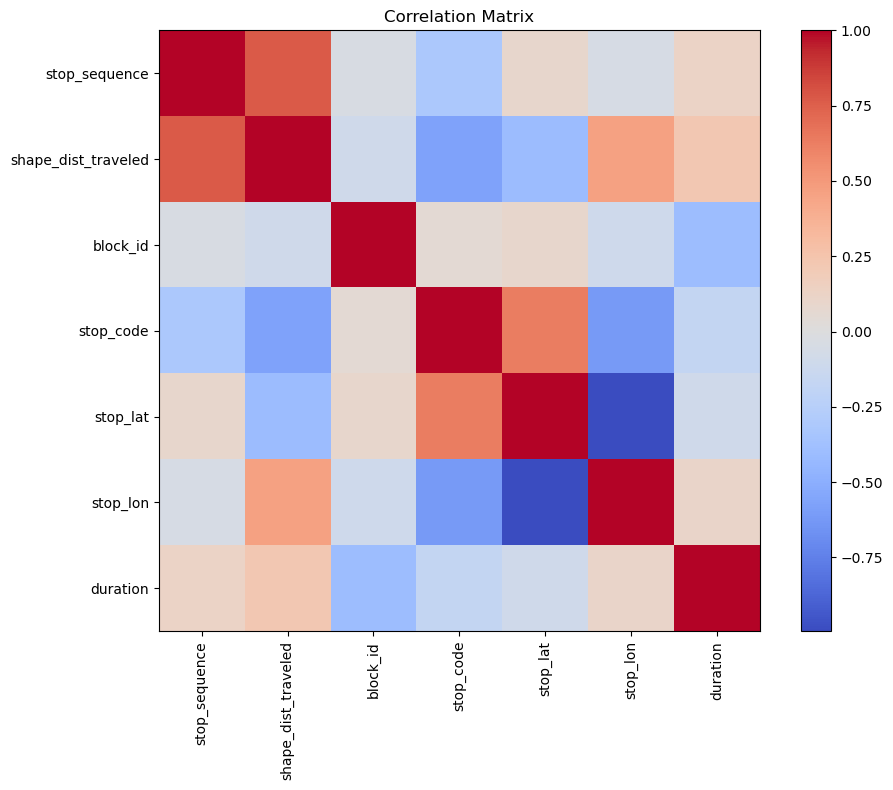

In [269]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.index)), correlation_matrix.index)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


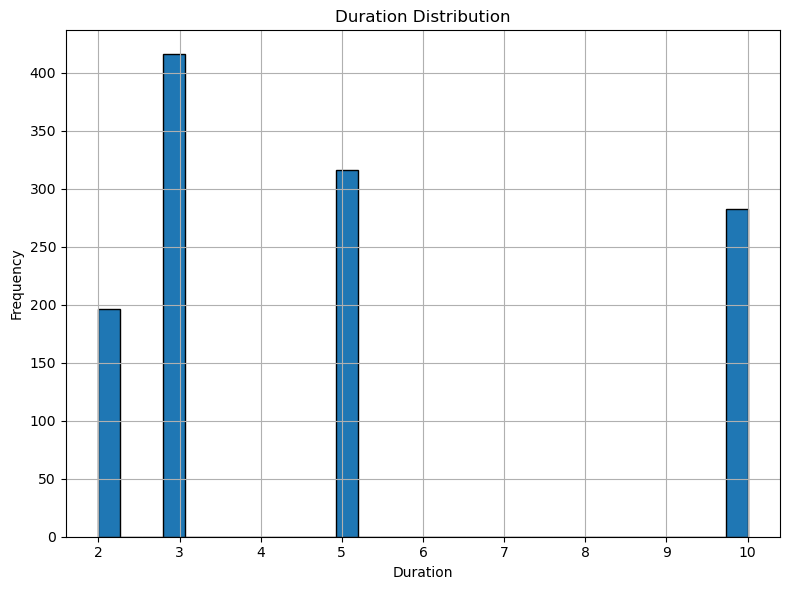

In [270]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['duration'], bins=30, edgecolor='black')
plt.title('Duration Distribution')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


In [271]:
pip install mlxtend


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 11.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [274]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

In [288]:
df.columns

Index(['stop_sequence', 'shape_dist_traveled', 'route_id', 'service_id',
       'trip_headsign', 'block_id', 'shape_id', 'stop_code', 'stop_name',
       'stop_lat', 'stop_lon', 'duration'],
      dtype='object')

In [286]:
# df.drop(columns=['arrival_time', 'departure_time'], inplace=True)

In [289]:
df.head()

,stop_sequence,shape_dist_traveled,route_id,service_id,trip_headsign,block_id,shape_id,stop_code,stop_name,stop_lat,stop_lon,duration
3776,12,2.386,5-193,2024-JUN-FINAL-Weekday-01,5 CARY/MAIN,577931,50148,3419.0,Transfer Station Bay F,37.543309,-77.432306,5.0
3808,12,2.386,5-193,2024-JUN-FINAL-Weekday-01,5 CARY/MAIN,577948,50148,3419.0,Transfer Station Bay F,37.543309,-77.432306,5.0
3840,12,2.386,5-193,2024-JUN-FINAL-Weekday-01,5 CARY/MAIN,577936,50148,3419.0,Transfer Station Bay F,37.543309,-77.432306,5.0
3872,12,2.386,5-193,2024-JUN-FINAL-Weekday-01,5 CARY/MAIN,577954,50148,3419.0,Transfer Station Bay F,37.543309,-77.432306,5.0
3904,12,2.386,5-193,2024-JUN-FINAL-Weekday-01,5 CARY/MAIN,577972,50148,3419.0,Transfer Station Bay F,37.543309,-77.432306,5.0


In [314]:
df.to_excel("cleaned_file.xlsx", index=False)


In [315]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Drop columns that aren't useful or are duplicates/redundant for prediction
drop_cols = ['arrival_time', 'departure_time', 'stop_name', 'service_id', 'trip_headsign']
df_model = df.drop(columns=drop_cols)

# Encode categorical variables
categorical_cols = ['route_id', 'block_id', 'shape_id', 'stop_code']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

# Define features and target
X = df_model.drop(columns=['duration'])
y = df_model['duration']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse


0.18333333333333338

In [317]:
pip install ace_tools

Note: you may need to restart the kernel to use updated packages.


In [319]:
import pandas as pd

# create the predictions vs actuals dataframe
results_df = pd.DataFrame({
    'predicted_duration': y_pred,
    'actual_duration': y_test.values
}).reset_index(drop=True)

# show a sample of 20 results
print(results_df.sample(20, random_state=42))


     predicted_duration  actual_duration
24                  5.0              5.0
6                   2.0              2.0
152                 5.0              5.0
232                10.0             10.0
238                10.0             10.0
175                 3.0              3.0
215                 3.0              3.0
150                 3.0              3.0
9                  10.0             10.0
113                 2.0              2.0
45                  2.0              2.0
209                10.0             10.0
227                 3.0              3.0
170                 3.0              3.0
82                  3.0              3.0
161                 3.0              3.0
236                 3.0              3.0
15                  2.0              2.0
66                  5.0              5.0
127                 3.0              3.0


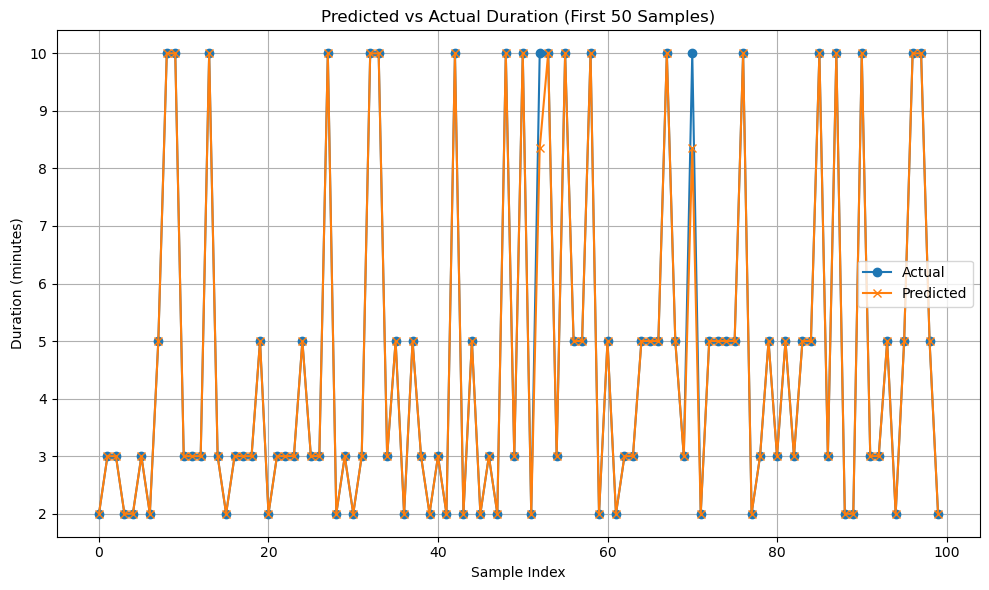

In [321]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(results_df['actual_duration'][:100], label='Actual', marker='o')
plt.plot(results_df['predicted_duration'][:100], label='Predicted', marker='x')
plt.title('Predicted vs Actual Duration (First 50 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Duration (minutes)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [344]:
import numpy as np
import pandas as pd

def predict_duration(raw_input, model, label_encoders):
    """
    Takes a raw input dictionary, encodes it, and returns the predicted duration.
    
    Parameters:
    - raw_input (dict): dictionary of feature values (e.g., stop_sequence, route_id, etc.)
    - model: trained scikit-learn model
    - label_encoders (dict): dictionary of fitted LabelEncoders for categorical features

    Returns:
    - float: predicted duration in minutes
    """
    encoded_input = {}

    for key, value in raw_input.items():
        if key in label_encoders:
            if value in label_encoders[key].classes_:
                encoded_input[key] = label_encoders[key].transform([value])[0]
            else:
                print(f"'{value}' not found in encoder for '{key}', using fallback -1")
                encoded_input[key] = -1  # fallback for unseen category
        else:
            encoded_input[key] = value

    # Convert to DataFrame to avoid sklearn warning
    X_new_df = pd.DataFrame([encoded_input])

    # Predict and return result
    predicted_duration = model.predict(X_new_df)[0]
    print(f"predicted duration: {predicted_duration:.2f} minutes")
    return predicted_duration

new_data_raw = {
    'stop_sequence': 12,
    'pickup_type': 0,
    'drop_off_type': 0,
    'shape_dist_traveled': 2.386,
    'timepoint': 1,
    'route_id': '5-193',
    'direction_id': 1,
    'block_id': '577931',
    'shape_id': '50148',
    'stop_code': '3419',
    'stop_lat': 37.543309,
    'stop_lon': -77.432306,
    'location_type': 0
}


# call the function
predict_duration(new_data_raw, model, label_encoders)


'577931' not found in encoder for 'block_id', using fallback -1
'3419' not found in encoder for 'stop_code', using fallback -1
predicted duration: 5.00 minutes


5.0

In [349]:
from sklearn.ensemble import RandomForestRegressor

# example: train the model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)  # make sure you’ve got training data

# now save it
import joblib
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [347]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.
